# Advanced Querying Mongo

Importing libraries and setting up connection

In [2]:
from pymongo import MongoClient
db = 'companies'
client = MongoClient(f"mongodb://localhost/{db}")
db = client.get_database()

In [3]:
# Your Code
cur = db.list_collections()
for collection in cur:
    print(collection)

{'name': 'companies', 'type': 'collection', 'options': {}, 'info': {'readOnly': False, 'uuid': UUID('76992dc7-b5e1-4dcd-9a37-b36c0e165615')}, 'idIndex': {'v': 2, 'key': {'_id': 1}, 'name': '_id_', 'ns': 'companies.companies'}}


### 1. All the companies whose name match 'Babelgum'. Retrieve only their `name` field.

In [4]:
cur = db.companies.find({"name":"Babelgum"})
for collec in cur:
    print(collec["name"])

Babelgum


### 2. All the companies that have more than 5000 employees. Limit the search to 20 companies and sort them by **number of employees**.

In [5]:
from pymongo import ASCENDING, DESCENDING
cur = db.companies.find({"number_of_employees":{ "$gt" :5000}}
                       ).sort([("number_of_employees", DESCENDING)]
                        ).limit(20)
for collec in cur:
    print( collec["number_of_employees"], collec["name"])

405000 Siemens
388000 IBM
320000 Toyota
300000 PayPal
227000 Nippon Telegraph and Telephone Corporation
221726 Samsung Electronics
205000 Accenture
200300 Tata Consultancy Services
200000 Flextronics International
186000 Safeway
180500 Sony
177000 LG
171000 Ford
160000 Boeing
140000 Digital Equipment Corporation
125000 Nokia
107000 MItsubishi Electric
107000 MItsubishi Electric
100000 Comcast
100000 Bertelsmann


### 3. All the companies founded between 2000 and 2005, both years included. Retrieve only the `name` and `founded_year` fields.

In [6]:
cur = db.companies.find({"founded_year":{"$gte":2000, "$lte":2005}}).count()

# comment out the long answer, and only querying the count()
#for coll in cur:
 #   print(coll['founded_year'], coll['name'], )
cur

/home/rh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


3734

### 4. All the companies that had a Valuation Amount of more than 100.000.000 and have been founded before 2010. Retrieve only the `name` and `ipo` fields.

In [7]:
# Your Code
cur = db.companies.find({"founded_year": {"$lt":2010},
                         "ipo.valuation_amount":{"$gt":100000000}
                        }).limit(3)

for coll in cur:
    print(coll['name'], coll['ipo'])

Facebook {'valuation_amount': 104000000000, 'valuation_currency_code': 'USD', 'pub_year': 2012, 'pub_month': 5, 'pub_day': 18, 'stock_symbol': 'NASDAQ:FB'}
Twitter {'valuation_amount': 18100000000, 'valuation_currency_code': 'USD', 'pub_year': 2013, 'pub_month': 11, 'pub_day': 7, 'stock_symbol': 'NYSE:TWTR'}
Yelp {'valuation_amount': 1300000000, 'valuation_currency_code': 'USD', 'pub_year': 2012, 'pub_month': 3, 'pub_day': 2, 'stock_symbol': 'NYSE:YELP'}


### 5. All the companies that have less than 1000 employees and have been founded before 2005. Order them by the number of employees and limit the search to 10 companies.

In [8]:
# Your Code
cur = db.companies.find({"number_of_employees":{"$lt":1000}, 
                         "founded_year":{"$lt":2005}
                        },{
                           "founded_year":1,"name":1, "number_of_employees":1,
                       }).limit(10).sort([("number_of_employees",DESCENDING)])

for x in list(cur):
    print(x["number_of_employees"], x["founded_year"],x['name'],"\t",)
    
# OK CREO QUE ES MUCHO MAS INTUITIVO QUE MYSQL TAMBIEN, AL MENOS A LA HORA DE QUERY

974 2000 Infinera Corporation 	
948 1997 NorthPoint Communications Group 	
931 1997 888 Holdings 	
903 1983 Forrester Research 	
900 1991 SonicWALL 	
900 1999 Webmetrics 	
881 1999 Cornerstone OnDemand 	
800 2004 Yelp 	
800 2000 ZoomInfo 	
800 2003 MySpace 	


### 6. All the companies that don't include the `partners` field.

In [9]:
cur1 = db.companies.find({"partners":{"$exists":True}}).count()
cur2 = db.companies.find({"partners":{"$exists":False}}).count()
cur1, cur2

/home/rh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.
/home/rh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


(18801, 0)

### 7. All the companies that have a null type of value on the `category_code` field.

In [10]:
db.companies.find({"category_code":{"$type":10}}).count()

/home/rh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


2751

### 8. All the companies that have at least 100 employees but less than 1000. Retrieve only the `name` and `number of employees` fields.

In [11]:
# Your Code
c =db.companies.find({"number_of_employees":{"$gt":100, "$lt":1000}},
                     {"number_of_employees":1,"name":1}
                    ).sort([("number_of_employees",-1)]).limit(10)
for c in c:
    print(c["number_of_employees"],c["name"])

984 Datamonitor
974 Infinera Corporation
950 Box
948 NorthPoint Communications Group
931 888 Holdings
903 Forrester Research
900 Workday
900 InMobi
900 Relax Solutions Pvt Ltd
900 SonicWALL


### 9. Order all the companies by their IPO price in a descending order.

In [12]:
# ¿Por que no funciona el query usando el operador $not  con $type??
# recibo muchos objects sin el key de ipo

c=db.companies.find({"ipo.valuation_amount":  {"$not":  {"$type":10}  }
                    }, {"name":1,"ipo.valuation_amount":1}
                   ) #.sort("ipo.valuation_amount",-1)
                   
for e in c.limit(20):
    print(e) #,e["ipo.valuation_amount"])

{'_id': ObjectId('52cdef7c4bab8bd675297d8b'), 'name': 'AdventNet'}
{'_id': ObjectId('52cdef7c4bab8bd675297d8a'), 'name': 'Wetpaint'}
{'_id': ObjectId('52cdef7c4bab8bd675297d8c'), 'name': 'Zoho'}
{'_id': ObjectId('52cdef7c4bab8bd675297d8f'), 'name': 'Omnidrive'}
{'_id': ObjectId('52cdef7c4bab8bd675297d91'), 'name': 'Geni'}
{'_id': ObjectId('52cdef7c4bab8bd675297d90'), 'name': 'Postini'}
{'_id': ObjectId('52cdef7c4bab8bd675297d8d'), 'name': 'Digg'}
{'_id': ObjectId('52cdef7c4bab8bd675297d92'), 'name': 'Flektor'}
{'_id': ObjectId('52cdef7c4bab8bd675297d93'), 'name': 'Fox Interactive Media'}
{'_id': ObjectId('52cdef7c4bab8bd675297d96'), 'name': 'Gizmoz'}
{'_id': ObjectId('52cdef7c4bab8bd675297d97'), 'name': 'Scribd'}
{'_id': ObjectId('52cdef7c4bab8bd675297d98'), 'name': 'Slacker'}
{'_id': ObjectId('52cdef7c4bab8bd675297d8e'), 'name': 'Facebook', 'ipo': {'valuation_amount': 104000000000}}
{'_id': ObjectId('52cdef7c4bab8bd675297d99'), 'name': 'Lala'}
{'_id': ObjectId('52cdef7c4bab8bd675297d9

In [13]:
c=db.companies.find({"ipo.valuation_amount":  {"$ne":  None  }
                    }, {"name":1,"ipo.valuation_amount":1}
                   ).sort("ipo.valuation_amount",-1).limit(10)
                   
for e in c:
    print(e["ipo"]["valuation_amount"], e["name"])

108960000000 GREE
104000000000 Facebook
100000000000 Amazon
18100000000 Twitter
12800000000 Groupon
11000000000 Tencent
9430000000 Western Digital
9310000000 LinkedIn
6000000000 BMC Software
5440000000 Rackspace


### 10. Retrieve the 10 companies with more employees, order by the `number of employees`

In [14]:
# Your Code
list(db.companies.find({},    {"number_of_employees":1, "name":1 }
                      ).sort([("number_of_employees",DESCENDING)]).limit(10))

[{'_id': ObjectId('52cdef7d4bab8bd67529941a'),
  'name': 'Siemens',
  'number_of_employees': 405000},
 {'_id': ObjectId('52cdef7c4bab8bd67529856a'),
  'name': 'IBM',
  'number_of_employees': 388000},
 {'_id': ObjectId('52cdef7d4bab8bd675299d33'),
  'name': 'Toyota',
  'number_of_employees': 320000},
 {'_id': ObjectId('52cdef7c4bab8bd675297e89'),
  'name': 'PayPal',
  'number_of_employees': 300000},
 {'_id': ObjectId('52cdef7e4bab8bd67529b0fe'),
  'name': 'Nippon Telegraph and Telephone Corporation',
  'number_of_employees': 227000},
 {'_id': ObjectId('52cdef7d4bab8bd675298aa4'),
  'name': 'Samsung Electronics',
  'number_of_employees': 221726},
 {'_id': ObjectId('52cdef7d4bab8bd675298b99'),
  'name': 'Accenture',
  'number_of_employees': 205000},
 {'_id': ObjectId('52cdef7e4bab8bd67529a657'),
  'name': 'Tata Consultancy Services',
  'number_of_employees': 200300},
 {'_id': ObjectId('52cdef7e4bab8bd67529aa51'),
  'name': 'Flextronics International',
  'number_of_employees': 200000},
 {'

### 11. All the companies founded on the second semester of the year. Limit your search to 1000 companies.

In [15]:
c = db.companies.find({"founded_month":{"$in":[e for e in range(7,13)]}}
                     ).limit(10)
for coll in c:
    print(coll["founded_month"], coll['name'],)

10 Wetpaint
9 Zoho
11 Omnidrive
10 Digg
10 Joost
11 Plaxo
10 Powerset
9 eBay
12 Kyte
12 Thoof


### 12. All the companies founded before 2000 that have an acquisition amount of more than 10.000.00

In [16]:
# Your Code
cur = db.companies.find({"founded_year":{"$lt":2000},
                  "acquisition.price_amount":{"$gt":1000000000}}).limit(10)

for e in cur:
    print( e["acquisition"]["price_amount"],e["acquisition"]["price_currency_code"],
          "\t", e["founded_year"], e['name'], 
          "\t\t",e['category_code'])

1500000000 USD 	 1998 PayPal 		 finance
7400000000 USD 	 1982 Sun Microsystems 		 enterprise
1200000000 USD 	 1999 Zappos 		 web
1008000000 USD 	 1998 Lastminute 		 web
4300000000 USD 	 1960 Sabre 		 web
1300000000 USD 	 1980 Digitas 		 web
1800000000 USD 	 1996 Omniture 		 advertising
1100000000 USD 	 1996 DoubleClick 		 advertising
8500000000 USD 	 1995 BEA Systems 		 software
6400000000 USD 	 1997 aQuantive 		 web


### 13. All the companies that have been acquired after 2010, order by the acquisition amount, and retrieve only their `name` and `acquisition` field.

In [17]:
c = db.companies.find({"acquisition.acquired_year":{"$gt":2010}},
                      {"name":1,"acquisition":1}
                     ).sort([("acquisition.price_amount", DESCENDING)]).limit(10)
for coll in c:
    print(e["acquisition"]["price_currency_code"],
          coll["acquisition"]["price_amount"],
          coll['name'])

USD 39000000000 T-Mobile
USD 18400000000 Goodrich Corporation
USD 6600000000 LSI
USD 6500000000 National Semiconductor
USD 4300000000 Ariba
USD 3700000000 NetLogic Microsystems
USD 3400000000 SuccessFactors
USD 3100000000 Qualcomm Atheros
USD 3000000000 Global Crossing
USD 3000000000 Global Crossing


### 14. Order the companies by their `founded year`, retrieving only their `name` and `founded year`.

In [18]:
c= db.companies.find({"founded_year":{"$gt":0}},
                     {"name":1,"founded_year":1}
                     ).sort([("founded_year",ASCENDING)]   
                     ).limit(10)
for e in c:
    print(e["founded_year"],e["name"])

1800 Alstrasoft
1800 SmallWorlds
1800 US Army
1802 DuPont
1833 McKesson
1833 Bachmann Industries
1835 Bertelsmann
1836 Accuity
1839 CENTRA
1840 WeGame


### 15. All the companies that have been founded on the first seven days of the month, including the seventh. Sort them by their `acquisition price` in a descending order. Limit the search to 10 documents.

In [19]:
days=[e for e in range(8)]
c = db.companies.find({"founded_day":{"$in":days}}).limit(10)
for e in c:
    print(e["founded_day"], e["name"])

1 Omnidrive
1 Geni
2 Postini
1 Fox Interactive Media
1 Gizmoz
1 Facebook
1 StumbleUpon
1 Helio
1 Joost
1 Babelgum


### 16. All the companies on the 'web' `category` that have more than 4000 employees. Sort them by the amount of employees in ascending order.

In [20]:
# Your Code
c=db.companies.find({"category_code":"web", "number_of_employees":{"$gt":4000}}
                   ).sort([("number_of_employees",ASCENDING)])
for e in c:
    print(e["category_code"], e["number_of_employees"], e["name"])

web 4400 Expedia
web 8000 AOL
web 8657 Webkinz
web 10000 Rakuten
web 10000 Los Angeles Times Media Group
web 10000 Groupon
web 13600 Yahoo!
web 15000 eBay
web 15500 Experian


### 17. All the companies whose acquisition amount is more than 10.000.000, and currency is 'EUR'.

In [21]:
# Your Code
c=db.companies.find({"acquisition.price_amount":{"$gt":10000000},
                     "acquisition.price_currency_code":"EUR"})

for e in c:
    print(e["acquisition"]["price_amount"], e["acquisition"]["price_currency_code"],
          e["category_code"],
          e["number_of_employees"],"\t", e["name"])

31500000 EUR mobile 25 	 ZYB
140000000 EUR mobile None 	 Apertio
40000000 EUR public_relations None 	 Greenfield Online
70000000 EUR web 50 	 Webedia
24000000 EUR None None 	 Wayfinder
70000000 EUR social 170 	 Tuenti Technologies
43400000 EUR ecommerce None 	 BioMed Central


### 18. All the companies that have been acquired on the first trimester of the year. Limit the search to 10 companies, and retrieve only their `name` and `acquisition` fields.

In [22]:
rng= [e for e in range(0,4)]
c=db.companies.find({"acquisition.acquired_month":{"$in":rng}},
                    {"name":1, "acquisition":1}).limit(10)
for e in c:
    print(e["acquisition"]["acquired_month"], e["name"])

c.count()

1 Kyte
2 NetRatings
3 blogTV
1 Livestream
2 iContact
2 Coghead
2 Dailymotion
2 Netvibes
3 Flickr
3 BabyCenter


/home/rh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys


642

# Bonus
### 19. All the companies that have been founded between 2000 and 2010, but have not been acquired before 2011.

In [29]:
# Your Code
c =db.companies.find({"founded_year":{"$gt":2000,"$lt":2010 },
                     "acquisition.acquired_year":{"$gte":2011}
                     },
                 ).limit(10)
for e in c:
    print(e["founded_year"], e["acquisition"]["acquired_year"] ,e["name"])

2005 2013 Wetpaint
2006 2012 Geni
2004 2012 Digg
2006 2011 Kyte
2005 2011 Jingle Networks
2006 2013 blogTV
2003 2011 delicious
2005 2012 Revision3
2003 2012 iContact
2006 2013 Mashery


### 20. All the companies that have been 'deadpooled' after the third year.

In [39]:
c=db.companies.find({"deadpooled_year":{"$gt":0}, "founded_year":{"$gt":0}},
                   ).limit(30)

#el filter afuera q es mas facil
for e in c:
    lifetime = e["deadpooled_year"]- e["founded_year"]
    if lifetime > 3:
        print(e["deadpooled_year"], e["founded_year"], "This company was deadpooled after: ",
          (e["deadpooled_year"]- e["founded_year"]),
          "\t\t",  e["name"])

2013 2007 This company was deadpooled after:  6 		 Babelgum
2013 2006 This company was deadpooled after:  7 		 Thoof
2010 2005 This company was deadpooled after:  5 		 Wesabe
2013 2006 This company was deadpooled after:  7 		 Stickam
2008 2004 This company was deadpooled after:  4 		 AllPeers
2012 2006 This company was deadpooled after:  6 		 EQO
2007 2000 This company was deadpooled after:  7 		 AllofMP3
2010 2006 This company was deadpooled after:  4 		 SellABand
2011 2005 This company was deadpooled after:  6 		 Zlio
2012 2006 This company was deadpooled after:  6 		 Jaiku
2009 2003 This company was deadpooled after:  6 		 Coghead
2010 2005 This company was deadpooled after:  5 		 Swivel
2011 2005 This company was deadpooled after:  6 		 Slide
2012 2004 This company was deadpooled after:  8 		 Sway
2012 2006 This company was deadpooled after:  6 		 coComment
2012 2006 This company was deadpooled after:  6 		 Hotelicopter
2012 2007 This company was deadpooled after:  5 		 Ujogo
2009 

In [42]:
# practicing previous lessons now
# i'd appreciate recommendations to improve code

import pandas as pd
from pandas.io.json import json_normalize


data = list( db.companies.find(
                                {"category_code":"web", "ipo":{"$ne": None}},                   
                               ).sort("founded_year",-1))

df = pd.json_normalize(data)
df

,_id,name,permalink,crunchbase_url,homepage_url,blog_url,blog_feed_url,twitter_username,category_code,number_of_employees,...,acquisition.acquired_day,acquisition.acquiring_company.name,acquisition.acquiring_company.permalink,image,ipo.valuation_amount,ipo.valuation_currency_code,ipo.pub_year,ipo.pub_month,ipo.pub_day,ipo.stock_symbol
0,52cdef7c4bab8bd675297fec,Fixya,fixya,http://www.crunchbase.com/company/fixya,http://www.fixya.com,http://blog.muktar.com,http://blog.muktar.com/feed/,MUaliyu,web,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52cdef7c4bab8bd67529801f,Wamba,wamba,http://www.crunchbase.com/company/wamba,http://wamba.com,http://corp.wamba.com,,,web,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52cdef7e4bab8bd67529a3b8,Clowdy,clowdy,http://www.crunchbase.com/company/clowdy,http://www.clowdy.com,http://blog.clowdy.com/,http://blog.clowdy.com/feed/,clowdycom,web,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52cdef7e4bab8bd67529b40e,Tongxue,tongxue,http://www.crunchbase.com/company/tongxue,http://www.tongxue.com,,,,web,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52cdef7c4bab8bd675297fb1,headr,headr,http://www.crunchbase.com/company/headr,http://www.headr.com,http://tripodsocial.tumblr.com/,,tripodsocial,web,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,52cdef7f4bab8bd67529c651,eNom,enom,http://www.crunchbase.com/company/enom,http://www.enom.com,,,,web,NaN,...,3.0,Demand Media,demandmedia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3783,52cdef7f4bab8bd67529c66e,MedTrackAlert,medtrackalert,http://www.crunchbase.com/company/medtrackalert,,,,,web,NaN,...,NaN,HealthCentral,healthcentral,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3784,52cdef7f4bab8bd67529c6db,Optemo,optemo,http://www.crunchbase.com/company/optemo,http://www.optemo.com,,,optemo,web,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3785,52cdef7f4bab8bd67529c6e5,Zoomission,zoomission,http://www.crunchbase.com/company/zoomission,http://www.zoomission.com,,,zoomission,web,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#loaded some data, time to do an exploration
df2 = df
df2 = df2.drop(columns="_id")
df2.sort_values("ipo.pub_year", ascending=False)
df2["ipo.valuation_amount"] = df2["ipo.valuation_amount"].fillna(0)
df2[df["ipo.pub_year"] > 2010].sort_values("ipo.valuation_amount", ascending=False).head(3)

,name,permalink,crunchbase_url,homepage_url,blog_url,blog_feed_url,twitter_username,category_code,number_of_employees,founded_year,...,acquisition.price_amount,acquisition.price_currency_code,acquisition.term_code,acquisition.source_url,acquisition.source_description,acquisition.acquired_year,acquisition.acquired_month,acquisition.acquired_day,acquisition.acquiring_company.name,acquisition.acquiring_company.permalink
0,Groupon,groupon,http://www.crunchbase.com/company/groupon,http://www.groupon.com,http://www.groupon.com/blog/,feed://feeds2.feedburner.com/grouponblog,groupon,web,10000.0,2008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TripAdvisor,tripadvisor,http://www.crunchbase.com/company/tripadvisor,http://www.tripadvisor.com,http://blog.tripadvisor.com,,TripAdvisor,web,NaN,2000.0,...,NaN,USD,NaN,http://en.wikipedia.org/wiki/TripAdvisor,,2005.0,8.0,NaN,Expedia,expedia
28,Nielsen,nielsen,http://www.crunchbase.com/company/nielsen,http://nielsen.com,http://blog.nielsen.com/nielsenwire,,nielsenwire,web,NaN,1922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.columns
df.shape

(38, 58)

(38, 58)

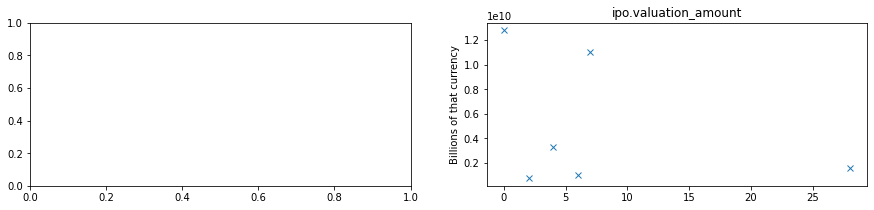

In [36]:
import matplotlib.pyplot as plt
f,a= plt.subplots(1,2, figsize=(15,3))

df4 = df['ipo.valuation_amount']

a[1].plot(df['ipo.valuation_amount'].dropna(), 'x')
#a[1].plot(df)

a[1].set_title('ipo.valuation_amount')
a[1].set_ylabel("Billions of that currency")
df.shape

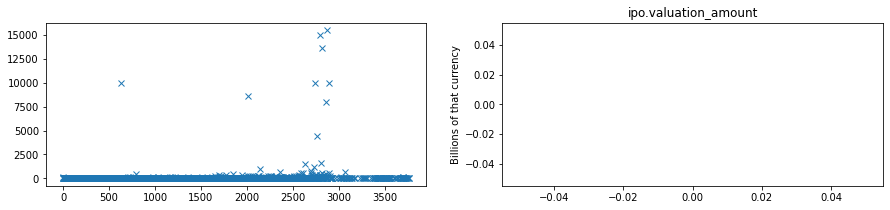

In [92]:
f,a= plt.subplots(1,2, figsize=(15,3))
df4 = df

a[1].plot(df[df.founded_year > 2010].dropna(), 'x')
#a[1].plot(df)

a[1].set_title('ipo.valuation_amount')
a[1].set_ylabel("Billions of that currency")
df5 = df[df.twitter_username != ''].sort_values("founded_year", ascending=False)
nothing = lambda x : x if x is x else 'NULL'
df6 = df5.groupby("founded_year").agg('mean')
a[0].plot(df.number_of_employees.T, 'x')
